In [1]:
from sklearn.datasets import fetch_mldata
from sklearn import model_selection

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
#from mnist import MNIST
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [4]:
shuffle_index = np.random.permutation(48000)
X_tr, y_tr = X_tr[shuffle_index], y_tr[shuffle_index]

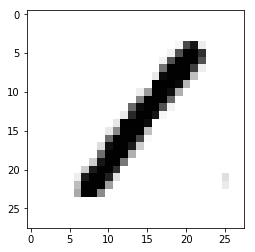

In [5]:
some_digit = X_tr[1784]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.show()

In [6]:
clf_rf = ExtraTreesClassifier(n_estimators=200, n_jobs=10,)
clf_rf.fit(X_tr, y_tr)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=10,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
clf_rf.predict([some_digit])


array([ 1.])

In [8]:
cross_val_score(clf_rf, X_val, y_val, cv=3, scoring="accuracy")

array([ 0.95303522,  0.95076231,  0.95445445])

In [9]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr.astype(np.float64))

In [10]:
cross_val_score(clf_rf, X_test, y_test, cv=3, scoring="accuracy")

array([ 0.93199521,  0.94569457,  0.9651547 ])

In [11]:
cross_val_score(clf_rf, X_tr_scaled, y_tr, cv=3, scoring="accuracy")
y_tr_pred = cross_val_predict(clf_rf, X_tr_scaled, y_tr, cv=3)

print(cross_val_score)

<function cross_val_score at 0x110ae7d08>


In [12]:
confusion_matrix = confusion_matrix(y_tr, y_tr_pred)
print(confusion_matrix)

[[4652    1    4    0    2    7   13    0   21    3]
 [   1 5359   28   11    7    4    5   11    6    3]
 [  23    7 4611   20   23    2   20   36   30    9]
 [   8    4   59 4690    4   54    5   38   41   25]
 [   5   10    9    0 4536    0   25    8   11   84]
 [  14    5    9   49    9 4150   38    3   23   22]
 [  19    6    3    0    6   32 4612    0   13    0]
 [   3   18   43    5   26    0    0 4795    7   57]
 [   9   23   18   40   18   38   20    7 4498   47]
 [  15    9   12   52   50   18    2   38   33 4551]]


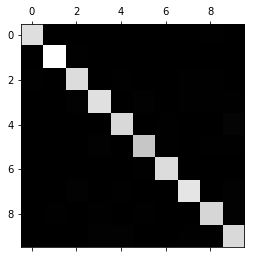

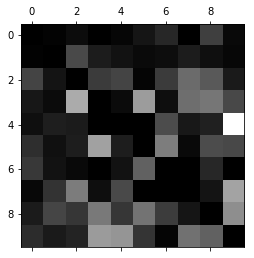

In [13]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()   

In [14]:
y_rf_pred = clf_rf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

0.97209999999999996

In [15]:
print (precision_score(y_tr, y_tr_pred, average = None))
print (precision_score(y_tr, y_tr_pred, average = 'weighted'))

[ 0.97957465  0.98474825  0.96142619  0.96363263  0.96902371  0.96399535
  0.97299578  0.97143436  0.96049541  0.94792752]
0.967772864576


In [16]:
print(recall_score(y_tr, y_tr_pred, average = None))
print(recall_score(y_tr, y_tr_pred, average = 'weighted'))

[ 0.98915586  0.98601656  0.96444259  0.95170455  0.96757679  0.96020361
  0.98315924  0.96790472  0.95337007  0.95209205]
0.967791666667


In [17]:
print(f1_score(y_tr, y_tr_pred, average = None))
print(f1_score(y_tr, y_tr_pred, average = 'weighted'))

[ 0.98434194  0.985382    0.96293202  0.95763144  0.96829971  0.96209575
  0.97805111  0.96966633  0.95691948  0.95000522]
0.967770827312
